In [1]:
import pandas as pd

In [32]:
strict = pd.read_csv('RawTotalCites(strict).csv', index_col=0, names=['Paragraph','Strict Score'])

In [33]:
strict

,Strict Score
Paragraph,
0.1,0.000
0.2,0.000
0.3,0.999
0.4,0.999
0.5,1.832
...,...
Abs31,0.000
Abs32,0.000
Abs33,0.000


In [34]:
agressive = pd.read_csv('RawTotalCites.csv', index_col=0, names=['Paragraph','Aggressive Score'])

In [35]:
agressive

,Aggressive Score
Paragraph,
0.1,0.000
0.2,0.000
0.3,0.999
0.4,0.999
0.5,1.832
...,...
Abs31,0.000
Abs32,0.000
Abs33,0.000


In [36]:
strict['Agressive Score'] = agressive['Aggressive Score']

In [37]:
strict['Agressive Score']['Abs35']

21.5

In [38]:
def df_col_similarity(df, colx, coly):
    total_diff = 0
    for para in df.index:
        total_diff += abs(df[colx][para] - df[coly][para])
    return total_diff

In [39]:
df_col_similarity(strict, 'Agressive Score', 'Strict Score')

1011.5990000000013

In [40]:
strict['Difference'] = abs(strict['Agressive Score'] - strict['Strict Score'])

In [41]:
strict.sort_values('Difference', ascending=False).to_csv('Strict_Agg_comp.csv')

In [42]:
strict_comp_data = pd.read_csv("overall_similarity_scores(strict).csv")
aggressive_comp_data = pd.read_csv("overall_similarity_scores.csv")

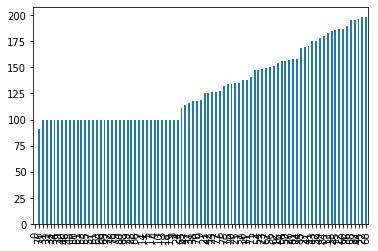

In [51]:
strict_comp_data['RelativeTotalCites'].sort_values().plot.bar()

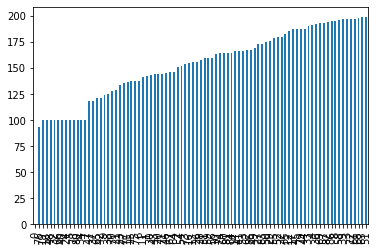

In [52]:
aggressive_comp_data['RelativeTotalCites'].sort_values().plot.bar()

In [59]:
strict_cite_counter = pd.read_csv("cite_counts(strict).csv", index_col=0, names=['Counts'])
agg_cite_counter = pd.read_csv("cite_counts.csv", index_col=0, names=['Counts'])

In [60]:
strict_cite_counter.columns

Index(['Counts'], dtype='object')

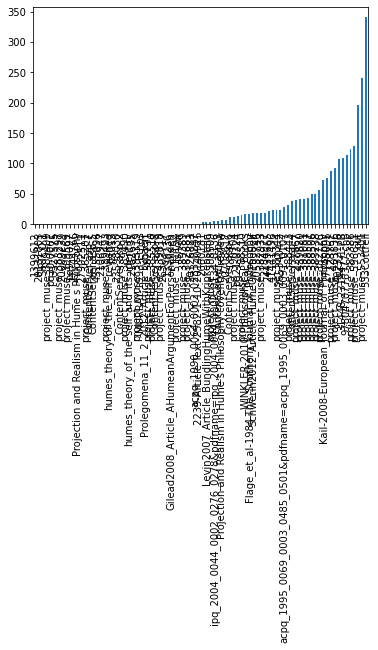

In [61]:
strict_cite_counter['Counts'].sort_values().plot.bar()

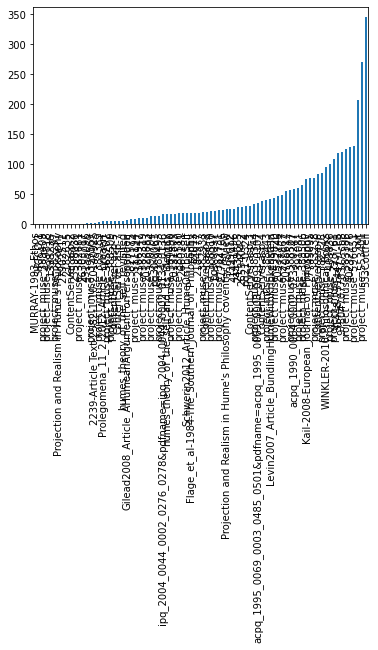

In [62]:
agg_cite_counter['Counts'].sort_values().plot.bar()

In [64]:
articles = 'Unnamed: 0'

In [67]:
aggressive_comp_data[articles]

0      RelativeTotalCites
1     project_muse_388510
2               pq21-0324
3     ContentServer.asp-5
4     ContentServer.asp-8
             ...         
82    project_muse_511194
83                3327575
84    project_muse_382726
85               24439665
86    project_muse_383319
Name: Unnamed: 0, Length: 87, dtype: object

In [69]:
art_names = aggressive_comp_data[articles]
art_names

0      RelativeTotalCites
1     project_muse_388510
2               pq21-0324
3     ContentServer.asp-5
4     ContentServer.asp-8
             ...         
82    project_muse_511194
83                3327575
84    project_muse_382726
85               24439665
86    project_muse_383319
Name: Unnamed: 0, Length: 87, dtype: object

In [103]:
a = aggressive_comp_data[art_names[70]] < 102
b = aggressive_comp_data[art_names[70]] > 98

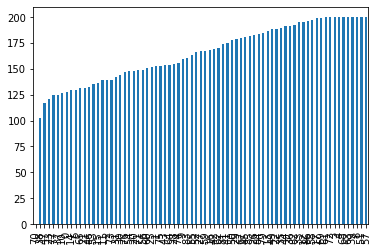

In [166]:
drop_index = aggressive_comp_data[art_names[70]][a & b].index
dropper = drop_index.values.tolist()
aggressive_comp_data.drop(drop_index).sort_values(art_names[70])[art_names[70]]

In [179]:
def get_relative_to_lit(art_name):
    article_filter = aggressive_comp_data[articles] == art_name
    score = aggressive_comp_data[article_filter]['RelativeTotalCites'].values[0]
    return score

,Unnamed: 0,RelativeTotalCites,project_muse_388510,pq21-0324,ContentServer.asp-5,ContentServer.asp-8,1398236,project_muse_439820,MURRAY-1993-Ethos,Gilead2008_Article_AHumeanArgumentForPersonalIden,...,27745095,23598030,Prolegomena_11_2_2012_Article_Lybaert,Projection and Realism in Hume s Philosophy,project_muse_382933,project_muse_511194,3327575,project_muse_382726,24439665,project_muse_383319
82,project_muse_511194,194.214,196.199,195.565,199.999,157.487,99.995,192.244,99.995,199.995,...,195.24,99.995,199.995,99.995,195.553,0.0,199.996,198.808,193.299,194.996


In [178]:
def most_similar(article):
    #exclude no citeswhich are all about 100
    no_cites_filter = (aggressive_comp_data[article] > 99) & (aggressive_comp_data[article] < 101)
    excluded_no_cites = aggressive_comp_data[no_cites_filter]
        
    #generate list of top 10 and those within 5% of top 10
    top_10 = excluded_no_cites[article].sort_values()[1:11]
    within_5_of_num_ten = []
    num_10_name = excluded_no_cites[article].sort_values().tolist()[11]
    g_no_10_filter = excluded_no_cites[article] > no_10_score

194.21399999999844

In [182]:
aggressive_comp_data['project_muse_511194'].sort_values()

82      0.000
34     99.995
40     99.995
66     99.995
48     99.995
       ...   
3     199.999
72    199.999
41    200.000
11    200.003
60    200.004
Name: project_muse_511194, Length: 87, dtype: float64

In [184]:
aggressive_comp_data[(aggressive_comp_data['project_muse_511194'] > 99) & (aggressive_comp_data['project_muse_511194'] < 101)]

,Unnamed: 0,RelativeTotalCites,project_muse_388510,pq21-0324,ContentServer.asp-5,ContentServer.asp-8,1398236,project_muse_439820,MURRAY-1993-Ethos,Gilead2008_Article_AHumeanArgumentForPersonalIden,...,27745095,23598030,Prolegomena_11_2_2012_Article_Lybaert,Projection and Realism in Hume s Philosophy,project_muse_382933,project_muse_511194,3327575,project_muse_382726,24439665,project_muse_383319
5,1398236,99.997,99.992,100.012,100.004,99.99,0.0,100.013,0.0,100.0,...,100.007,0.0,100.0,0.0,99.998,99.995,100.001,99.989,100.02,100.003
7,MURRAY-1993-Ethos,99.997,99.992,100.012,100.004,99.99,0.0,100.013,0.0,100.0,...,100.007,0.0,100.0,0.0,99.998,99.995,100.001,99.989,100.02,100.003
18,project_muse_439818,99.997,99.992,100.012,100.004,99.99,0.0,100.013,0.0,100.0,...,100.007,0.0,100.0,0.0,99.998,99.995,100.001,99.989,100.02,100.003
19,2182635,99.997,99.992,100.012,100.004,99.99,0.0,100.013,0.0,100.0,...,100.007,0.0,100.0,0.0,99.998,99.995,100.001,99.989,100.02,100.003
24,SIRTCO.1,99.997,99.992,100.012,100.004,99.99,0.0,100.013,0.0,100.0,...,100.007,0.0,100.0,0.0,99.998,99.995,100.001,99.989,100.02,100.003
32,project_muse_389409,99.997,99.992,100.012,100.004,99.99,0.0,100.013,0.0,100.0,...,100.007,0.0,100.0,0.0,99.998,99.995,100.001,99.989,100.02,100.003
34,20009239,99.997,99.992,100.012,100.004,99.99,0.0,100.013,0.0,100.0,...,100.007,0.0,100.0,0.0,99.998,99.995,100.001,99.989,100.02,100.003
40,27902511,99.997,99.992,100.012,100.004,99.99,0.0,100.013,0.0,100.0,...,100.007,0.0,100.0,0.0,99.998,99.995,100.001,99.989,100.02,100.003
48,ContentServer.asp-2,99.997,99.992,100.012,100.004,99.99,0.0,100.013,0.0,100.0,...,100.007,0.0,100.0,0.0,99.998,99.995,100.001,99.989,100.02,100.003
66,project_muse_383297,99.997,99.992,100.012,100.004,99.99,0.0,100.013,0.0,100.0,...,100.007,0.0,100.0,0.0,99.998,99.995,100.001,99.989,100.02,100.003


In [201]:
test_score = aggressive_comp_data[aggressive_comp_data[articles]=='project_muse_511194']['RelativeTotalCites']
test_score

82    194.214
Name: RelativeTotalCites, dtype: float64

In [206]:
more_than_5_lower = aggressive_comp_data['RelativeTotalCites'] > (.95 * test_score.values[0])
more_than_5_lower

0     False
1     False
2     False
3      True
4      True
      ...  
82     True
83    False
84    False
85    False
86     True
Name: RelativeTotalCites, Length: 87, dtype: bool

In [207]:
less_than_five_higher = aggressive_comp_data['RelativeTotalCites'] < (1.05 * test_score.values[0])
less_than_five_higher

0     True
1     True
2     True
3     True
4     True
      ... 
82    True
83    True
84    True
85    True
86    True
Name: RelativeTotalCites, Length: 87, dtype: bool

In [230]:
five_list = aggressive_comp_data[less_than_five_higher & more_than_5_lower][articles]
five_list.sort_values()

33                                             20131803
57                                              2106947
58                 2239-Article Text-2582-1-10-20140925
63                                             26303717
51                                             43155096
3                                   ContentServer.asp-5
72                                  ContentServer.asp-7
4                                   ContentServer.asp-8
12    Flage_et_al-1984-The_Southern_Journal_of_Philo...
8     Gilead2008_Article_AHumeanArgumentForPersonalIden
44    Projection and Realism in Hume's Philosophy co...
79                Prolegomena_11_2_2012_Article_Lybaert
68                                                fshow
17                                               fzt013
61                                  project_muse_365207
36                                  project_muse_382681
86                                  project_muse_383319
69                                  project_muse

In [261]:
art_list = aggressive_comp_data.sort_values('project_muse_511194')[articles][0:len(five_list)]
tenth_article = art_list.values.tolist()[11]
print(tenth_article)
tenth_article_score = aggressive_comp_data[aggressive_comp_data[articles] == tenth_article]['project_muse_511194'].values[0]
print(tenth_article_score)
within_5 = (aggressive_comp_data['project_muse_511194'] < (tenth_article_score * 1.05)) & (aggressive_comp_data['project_muse_511194'] > tenth_article_score)
articles_within_5 = aggressive_comp_data[within_5]
articles_within_5

Projection and Realism in Hume s Philosophy
99.995


,Unnamed: 0,RelativeTotalCites,project_muse_388510,pq21-0324,ContentServer.asp-5,ContentServer.asp-8,1398236,project_muse_439820,MURRAY-1993-Ethos,Gilead2008_Article_AHumeanArgumentForPersonalIden,...,27745095,23598030,Prolegomena_11_2_2012_Article_Lybaert,Projection and Realism in Hume s Philosophy,project_muse_382933,project_muse_511194,3327575,project_muse_382726,24439665,project_muse_383319


OKAY so the following function does a good job returning the top 10 most simliar articlse along with any articles that are within 5% of the similarity score of the 10th article

In [374]:
def most_similar(article):
    #exclude no citeswhich are all about 100 for relative total cites
    #since that's the difference betwen total cites and no cits
    #it would be better to just filter them out from the start though so we don't have to worry about dealing wiht the
    no_cites_filter = (aggressive_comp_data['RelativeTotalCites'] > 99) & (aggressive_comp_data['RelativeTotalCites'] < 101)
    cites_to_exclude = aggressive_comp_data[no_cites_filter]
    excluded_cites = aggressive_comp_data.drop(cites_to_exclude.index)
        
    #generate list of top 10 and those within 5% of top 10
    top_10 = excluded_cites.sort_values(article)[1:11]
    num_10_name = top_10[articles].values.tolist()[9]
    num_10_score = excluded_cites[excluded_cites[articles] == num_10_name][article].values[0]
    within_5_of_num_10 = excluded_cites[article] <= 1.05 * num_10_score
    result_articles = excluded_cites[within_5_of_num_10].sort_values(article)[[articles,article]][1:]
    
    return result_articles.values

In [376]:
most_similar('project_muse_383238')

array([['project_muse_388507', 112.62600000000009],
       ['project_muse_227867', 125.34700000000015],
       ['project_muse_383386', 126.45699999999998],
       ['project_muse_388506', 127.47700000000003],
       ['RelativeTotalCites', 128.99100000000072],
       ['9780470776377.ch8', 131.6230000000001],
       ['project_muse_391081', 131.92199999999997],
       ['acpq_1995_0069_0003_0485_0501&pdfname=acpq_1995_0069_0003_0091_0107',
        132.73800000000008],
       ['2653404-2', 137.67700000000002],
       ['project_muse_553401', 140.95299999999992],
       ['acpq_1990_0064_0002_0233_0247', 143.65100000000004],
       ['project_muse_596651', 144.01000000000005],
       ['2184977', 145.23000000000005],
       ['27745095', 146.41900000000004]], dtype=object)

The next thing to work on is getting the percentiles of similarity scores so we can grade match scores. IE 90th percentile or better mathes = A quality match. 80th percentile is a B quality Match, etc.

To Start, let's work with all the papers that actually exist

In [377]:
no_cites_filter = (aggressive_comp_data['RelativeTotalCites'] > 99) & (aggressive_comp_data['RelativeTotalCites'] < 101)
cites_to_exclude = aggressive_comp_data[no_cites_filter]
excluded_cites = aggressive_comp_data.drop(cites_to_exclude.index)
excluded_cites

,Unnamed: 0,RelativeTotalCites,project_muse_388510,pq21-0324,ContentServer.asp-5,ContentServer.asp-8,1398236,project_muse_439820,MURRAY-1993-Ethos,Gilead2008_Article_AHumeanArgumentForPersonalIden,...,27745095,23598030,Prolegomena_11_2_2012_Article_Lybaert,Projection and Realism in Hume s Philosophy,project_muse_382933,project_muse_511194,3327575,project_muse_382726,24439665,project_muse_383319
0,RelativeTotalCites,0.000,142.335,150.391,196.855,191.183,99.997,137.836,99.997,195.443,...,135.424,99.997,187.631,99.997,164.675,194.214,172.600,164.790,166.821,195.430
1,project_muse_388510,142.335,0.000,157.416,199.996,199.982,99.992,170.251,99.992,199.992,...,157.523,99.992,199.992,99.992,158.010,196.199,188.629,178.709,184.818,199.995
2,pq21-0324,150.391,157.416,0.000,193.346,188.888,100.012,160.369,100.012,200.012,...,143.857,100.012,200.012,100.012,182.242,195.565,178.909,194.473,193.114,197.793
3,ContentServer.asp-5,196.855,199.996,193.346,0.000,190.004,100.004,200.017,100.004,200.004,...,200.011,100.004,200.004,100.004,190.002,199.999,200.005,196.465,199.712,200.007
4,ContentServer.asp-8,191.183,199.982,188.888,190.004,0.000,99.990,196.217,99.990,176.654,...,194.069,99.990,199.990,99.990,197.488,157.487,186.659,197.235,182.720,187.493
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,project_muse_511194,194.214,196.199,195.565,199.999,157.487,99.995,192.244,99.995,199.995,...,195.240,99.995,199.995,99.995,195.553,0.000,199.996,198.808,193.299,194.996
83,3327575,172.600,188.629,178.909,200.005,186.659,100.001,166.302,100.001,175.001,...,133.668,100.001,120.839,100.001,162.485,199.996,0.000,193.914,193.119,193.340
84,project_muse_382726,164.790,178.709,194.473,196.465,197.235,99.989,195.160,99.989,196.853,...,191.416,99.989,199.989,99.989,195.129,198.808,193.914,0.000,191.015,192.936
85,24439665,166.821,184.818,193.114,199.712,182.720,100.020,178.063,100.020,196.568,...,186.541,100.020,200.020,100.020,191.528,193.299,193.119,191.015,0.000,186.215


In [412]:
numbers_only = excluded_cites.drop(axis=1, labels=articles)

In [445]:
numbers_only

,RelativeTotalCites,project_muse_388510,pq21-0324,ContentServer.asp-5,ContentServer.asp-8,1398236,project_muse_439820,MURRAY-1993-Ethos,Gilead2008_Article_AHumeanArgumentForPersonalIden,533Cottrell,...,27745095,23598030,Prolegomena_11_2_2012_Article_Lybaert,Projection and Realism in Hume s Philosophy,project_muse_382933,project_muse_511194,3327575,project_muse_382726,24439665,project_muse_383319
0,0.000,142.335,150.391,196.855,191.183,99.997,137.836,99.997,195.443,123.721,...,135.424,99.997,187.631,99.997,164.675,194.214,172.600,164.790,166.821,195.430
1,142.335,0.000,157.416,199.996,199.982,99.992,170.251,99.992,199.992,178.200,...,157.523,99.992,199.992,99.992,158.010,196.199,188.629,178.709,184.818,199.995
2,150.391,157.416,0.000,193.346,188.888,100.012,160.369,100.012,200.012,180.652,...,143.857,100.012,200.012,100.012,182.242,195.565,178.909,194.473,193.114,197.793
3,196.855,199.996,193.346,0.000,190.004,100.004,200.017,100.004,200.004,197.706,...,200.011,100.004,200.004,100.004,190.002,199.999,200.005,196.465,199.712,200.007
4,191.183,199.982,188.888,190.004,0.000,99.990,196.217,99.990,176.654,194.764,...,194.069,99.990,199.990,99.990,197.488,157.487,186.659,197.235,182.720,187.493
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,194.214,196.199,195.565,199.999,157.487,99.995,192.244,99.995,199.995,197.217,...,195.240,99.995,199.995,99.995,195.553,0.000,199.996,198.808,193.299,194.996
83,172.600,188.629,178.909,200.005,186.659,100.001,166.302,100.001,175.001,145.615,...,133.668,100.001,120.839,100.001,162.485,199.996,0.000,193.914,193.119,193.340
84,164.790,178.709,194.473,196.465,197.235,99.989,195.160,99.989,196.853,183.883,...,191.416,99.989,199.989,99.989,195.129,198.808,193.914,0.000,191.015,192.936
85,166.821,184.818,193.114,199.712,182.720,100.020,178.063,100.020,196.568,175.350,...,186.541,100.020,200.020,100.020,191.528,193.299,193.119,191.015,0.000,186.215


In [497]:
all_scores = pd.Series(dtype='float64')

In [498]:
for column in numbers_only.columns:
    all_scores = all_scores.append(numbers_only[column])

In [507]:
ranks = all_scores[all_scores>0].rank(pct=True)
#this version has no zeros
all_scores[all_scores>0].describe()

count    6448.000000
mean      169.723181
std        34.012516
min        93.168000
25%       154.483000
50%       182.580500
75%       197.373750
max       200.028000
dtype: float64

In [501]:
#this is the total body
all_scores.describe()

count    6525.000000
mean      167.720318
std        38.459977
min         0.000000
25%       153.088000
50%       182.242000
75%       197.233000
max       200.028000
dtype: float64

In [509]:
for mark in [.1, .2, .3, .4, .5, .6, .7, .8, .9]:
    print(all_scores[all_scores>0].quantile(q=mark))

100.00300000000006
144.43019999999996
162.5810000000002
175.14899999999992
182.58049999999983
189.64700000000002
195.24000000000007
199.55020000000002
200.0000000000001


In [549]:
similarity_grade_dict = {}
similarity_grade_dict['A'] = all_scores[all_scores>0].quantile(q=.1)
similarity_grade_dict['B'] = all_scores[all_scores>0].quantile(q=.2)
similarity_grade_dict['C'] = all_scores[all_scores>0].quantile(q=.3)
similarity_grade_dict['D'] = all_scores[all_scores>0].quantile(q=.4)

In [550]:
def similarity_grader(score):
    if score < similarity_grade_dict['A']:
        return 'A'
    elif score < similarity_grade_dict['B']:
        return 'B'
    elif score < similarity_grade_dict['C']:
        return 'C'
    elif score < similarity_grade_dict['D']:
        return 'D'
    else:
        return 'F'

In [555]:
similarity_grader(99)

99
100.00300000000006
True


'A'

now that I have a grader for the similarity scores, we can attach a grade to each of the similarity scores we find in the similarity finder. Or I could use these grades to filter the similarity grades. Ie Only return C or better. 

Or we could only look for articles with or without a certain number of A or better than B, etc. quality matches.

It would also be good to filter by number of cites in the article, etc.

Below is a way to locate the percentile rank for a given score

In [519]:
non_zeroes = all_scores[all_scores>0]

In [521]:
scores_w_rank = pd.DataFrame(non_zeroes, columns=['scores'])

In [530]:
scores_w_rank['Ranks'] = round(scores_w_rank['scores'].rank(pct=True)*100, 1)

In [532]:
scores_w_rank.sort_values('scores')

,scores,Ranks
76,93.168,0.0
0,93.168,0.0
36,96.039,0.1
79,96.039,0.1
68,99.948,0.1
...,...,...
36,200.026,99.9
79,200.027,100.0
13,200.027,100.0
52,200.028,100.0
